# Mach Eight Sample Project

## Objective

### Task

The task is to write a function that finds pairs of integers from a list that sum to a given value. The function will take as input the list of numbers as well as the target sum.

### Evaluation

 We define "efficient" as faster than O(n^2) and "correct" as returning the correct results for all possible inputs.

### Libraries

In [2]:
# We import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from scipy.optimize import curve_fit

In [3]:
# Function to generate a list of random integers
def generateRandomList(n):
    arr = []
    for i in range(n):
        arr.append(random.randint(0, 2*n))
    return arr

# Function to generate a descending list
def generateDescendingList(n):
    arr = []
    for i in range(n):
        arr.append(n-i)
    return arr

# Funcion to generate ascending list
def generateAscendingList(n):
    arr =[]
    for i in range(1,n+1):
        arr.append(i)
    return arr

# function to generate a plot graph
def plotGraph(x, y, legend):
    plt.plot(x, y, label=legend)
    plt.grid()

## Proposed functions

In total, 6 functions are proposed ordered from the most complex to the most "efficient".

The first function is based on two sequential searches to find the two requested addends. Subsequently, functions 2, 3, 4 and 5 are based on binary search to find one of the addends, for this it is necessary to have an ordered list, for which ordering algorithms are used: quicksort, ```sort()```, mergesort and countingsort respectively. Finally function 6 makes use of dynamic programming.

### Function 1

The algorithmic complexity of a nested loop depends on the number of times each loop is executed and the complexity of the code that is executed within them.

In general, the algorithmic complexity of a nested loop can be calculated by multiplying the complexity of the inner loop by the complexity of the outer loop. For example, if you have an outer loop that executes n times and an inner loop that executes m times on each iteration of the outer loop, the algorithmic complexity would be O(nm).

Having said the above, we can conclude that the algorithmic complexity of the first function is quadratic. O(n^2)

In [4]:
'''
First proposed function. Find pairs of numbers that add up to an objective value.
A loop is used to set one element and another nested loop looks for the second element to store them in a list of tuples.
'''

def findPairs1(arr, sum):
    pairs = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] + arr[j] == sum:
                pairs.append((arr[i], arr[j]))
    return pairs

In [5]:
# Test of the first function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs1(arr, sum):
    print(i)

(5, 7)
(0, 12)
(-4, 16)


### Function 2

The question now is: how could we improve the efficiency of the algorithm of function 1 ?

**Proposal: It is proposed to remove the nested loop and replace it with a binary search.**

* Binary search is a search algorithm used to find a specific item within an ordered list of items. Binary search works by repeatedly splitting the list in half until it finds the item being searched for or determines that the item doesn't exist in the list.
* The algorithmic complexity of binary search is O(log n), which means that the execution time of the algorithm grows logarithmically with the size of the list of elements. This is because, on each iteration of the main loop, the list is split in half, so the number of items left to examine is halved.
* The O(log n) algorithmic complexity makes binary search much more efficient than other search techniques, such as sequential search, which has an algorithmic complexity of O(n) and requires examining all elements of the list to find the item being searched for.

The QuickSort sort algorithm is a quick sort algorithm used to sort a list of items. It works by selecting a list item as a pivot and then splitting the list into two sublists based on whether the items are less than or greater than the pivot. The QuickSort algorithm is then applied recursively to each of the sublists until they are completely sorted.

In [6]:
# Binary search function
def binarySearch(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0
    while low <= high:
        mid = (high + low) // 2
        if arr[mid] < x:
            low = mid + 1
        elif arr[mid] > x:
            high = mid - 1
        else:
            return True
    return False

# Quicksort function
def quickSort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr.pop()
    items_greater = []
    items_lower = []
    for item in arr:
        if item > pivot:
            items_greater.append(item)
        else:
            items_lower.append(item)
    return quickSort(items_lower) + [pivot] + quickSort(items_greater)

In [7]:
'''
Second proposed function. It is intended to reduce complexity by eliminating the second "for" loop. For this, binary search is used. This change requires the input list to be sorted, so the quicksort algorithm is used in the first instance.
'''
def findPairs2(arr, sum):
    pairs = []
    arr = quickSort(arr)
    for i in range(len(arr)-1):
        if binarySearch(arr[i+1:], sum-arr[i]):
            pairs.append((arr[i], sum-arr[i]))
    return pairs

In [8]:
# Test of the second function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs2(arr, sum):
    print(i)

(-4, 16)
(0, 12)
(5, 7)


### Function 3

The third proposed function follows the same logic as the second function with the difference that it uses the default Python function to sort the list: ```sorted( )```

Python's sorted function is a built-in function used to sort an iterable of items in ascending order. The sorted function uses the Timsort sorting algorithm, which is a hybrid algorithm that combines insertion sort and merge sort techniques.

In [9]:
'''
Third proposed function. Using the sorted() function to sort the list.
'''
def findPairs3(arr, sum):
    pairs = []
    arr = sorted(arr)
    for i in range(len(arr)-1):
        if binarySearch(arr[i+1:], sum-arr[i]):
            pairs.append((arr[i], sum-arr[i]))
    return pairs

In [10]:
# Test of the third function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs3(arr, sum):
    print(i)

(-4, 16)
(0, 12)
(5, 7)


### Function 4

Mergesort: This algorithm works by dividing the list of items to be sorted into smaller sublists, sorting each one individually, and then combining the sorted sublists back into a single fully sorted list. The complexity of the merge sort algorithm is O(n log n), which makes it very efficient for large lists.

In [11]:
def merge_sort(lst):
    # If the list has less than 2 elements, it is sorted
    if len(lst) < 2:
        return lst
    # Split the list into two halves
    mid = len(lst) // 2
    left = lst[:mid]
    right = lst[mid:]
    # Recursively sort the two halves
    left = merge_sort(left)
    right = merge_sort(right)
    # Combine the two sorted halves
    return merge(left, right)

def merge(left, right):
    result = []
    while left and right:
        if left[0] < right[0]:
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    # Add any remaining elements
    result.extend(left)
    result.extend(right)
    return result

In [12]:
'''
Fourth proposed function. It uses the mergesort algorithm.
'''
def findPairs4(arr, sum):
    pairs = []
    arr = merge_sort(arr)
    for i in range(len(arr)-1):
        if binarySearch(arr[i+1:], sum-arr[i]):
            pairs.append((arr[i], sum-arr[i]))
    return pairs

In [13]:
# Test of the fourth function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs4(arr, sum):
    print(i)

(-4, 16)
(0, 12)
(5, 7)


### Function 5

The time complexity of the counting sort algorithm is O(n+k), where "n" is the number of elements to sort and "k" is the range of values of the elements. This means that the execution time of the algorithm depends on the number of elements and the range of values of the elements, but not on the initial arrangement of the elements in the array.

In [14]:
def counting_sort(lst, max_val):
    # Create a list "count" with an entry for each possible value in the range of values
    count = [0] * (max_val + 1)
    # Register the list and increment by 1 the content of the corresponding entry in the "count" list for each element
    for val in lst:
        count[val] += 1
    # Accumulate the values ​​in the "count" list to get the final position of each element in the ordered list
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    # Create a result list with the same number of elements as the original list
    result = [0] * len(lst)
    # Loop through the original list and place each element in its final position in the result list using information from the "count" list
    for val in lst:
        result[count[val] - 1] = val
        count[val] -= 1
    # Return the result list as the ordered list
    return result


In [15]:
'''
Fifth proposed function. It uses the countingsort algorithm.
'''
def findPairs5(arr, sum):
    pairs = []
    arr = counting_sort(arr, max(arr))
    for i in range(len(arr)-1):
        if binarySearch(arr[i+1:], sum-arr[i]):
            pairs.append((arr[i], sum-arr[i]))
    return pairs

In [16]:
# Test of the fourth function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs5(arr, sum):
    print(i)

(0, 12)
(5, 7)
(16, -4)


### Function 6

Dynamic programming is an optimization technique used to solve complex problems. It is based on the idea of ​​breaking a problem into smaller subproblems and solving each one individually, saving the results to reuse later. In this way, the optimal solution for the complete problem can be gradually built.

In [17]:
def findPairs6(arr, sum):
    # create a dictionary to store the numbers we have already seen
    pairs = []
    numbers_viewed = {}
    # traverse the list
    for num in arr:
        # calculate the missing number to reach the sum
        missing_number = sum - num
        # if the missing number is in the dictionary, return the pair
        if missing_number in numbers_viewed:
            pairs.append((num, missing_number))
        else:
            numbers_viewed[num] = True
    # if we haven't found the match, we return None
    return pairs

In [18]:
# Test of the fourth function
arr = [1,9,5,0,20,-4,12,16,7]
sum = 12
for i in findPairs6(arr, sum):
    print(i)

(12, 0)
(16, -4)
(7, 5)


## GRAPHIC ANALYSIS

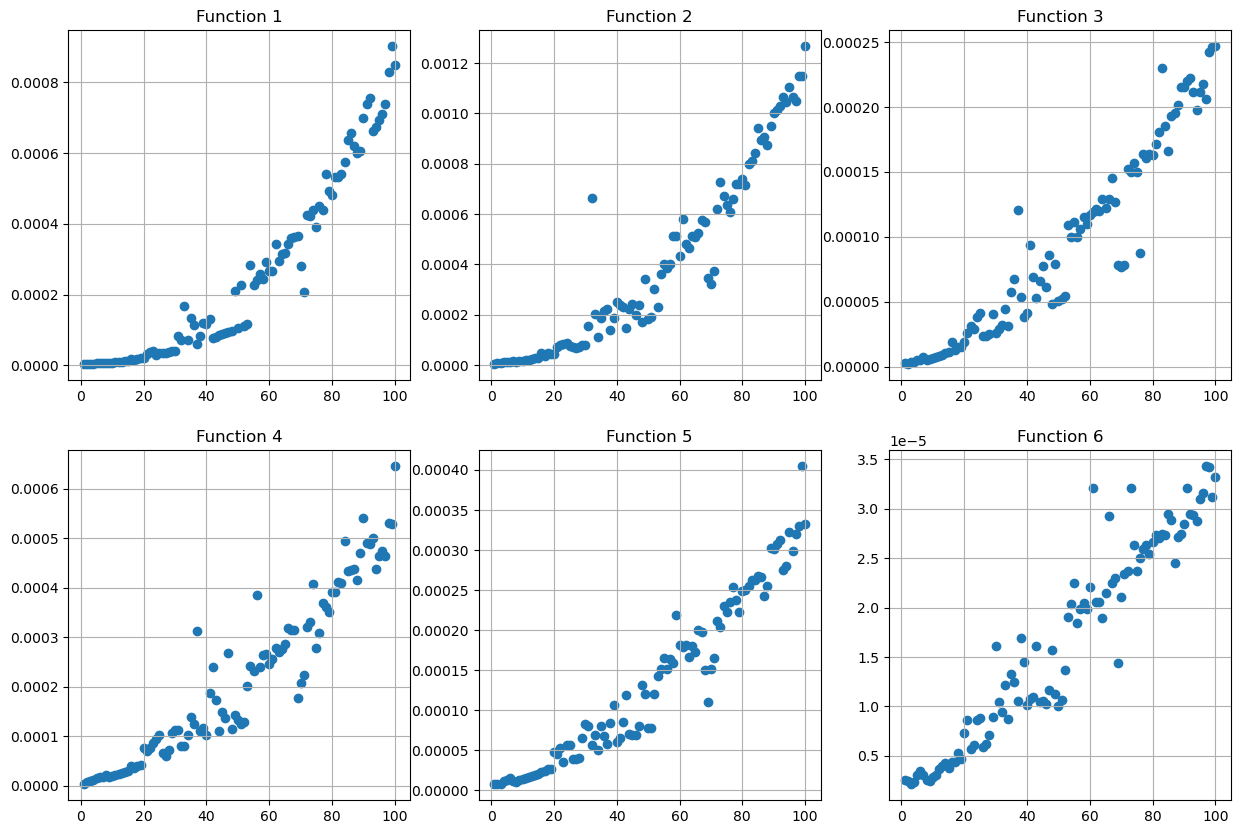

In [25]:
times1 = []
times2 = []
times3 = []
times4 = []
times5 = []
times6 = []
n = []
sum = 0 # The worst case for the binary search algorithm occurs when the element being searched for is not present in the list
N = 100
for i in range(1,N+1):
    arr = generateRandomList(i)
    n.append(i)

    '''
    The worst case for sequential searching occurs when the element being searched for is not found in the list or array being searched for. In this case, the sequential search will have to go through each element of the list one by one until it reaches the end of the list without finding the searched element.
    '''
    start = time.perf_counter()
    findPairs1(arr, sum)
    end = time.perf_counter()
    times1.append(end-start)

    '''
    The worst case for the QuickSort algorithm occurs when the array is already sorted in ascending or descending order. In this case, each recursive call of the algorithm will split the array into two parts, one with one element and one with the rest of the array, resulting in a time complexity of O(n^2).
    '''
    arr = generateAscendingList(i)

    start = time.perf_counter()
    findPairs2(arr, sum)
    end = time.perf_counter()
    times2.append(end-start)

    start = time.perf_counter()
    findPairs3(arr, sum)
    end = time.perf_counter()
    times3.append(end-start)

    '''
    The worst case for the Mergesort algorithm is when the list is sorted in reverse. In this case, each item in the list must be compared to all other items in the list to determine its final position, resulting in a running time of O(n^2). Although the average running time of the merge sort algorithm is O(n log n), the worst case is O(n^2).
    '''

    arr = generateDescendingList(i)

    start = time.perf_counter()
    findPairs4(arr, sum)
    end = time.perf_counter()
    times4.append(end-start)

    '''In the worst case for the count sorting algorithm, k is the largest possible value. Therefore, if k is very large compared to n, the execution time of the count-sorting algorithm may be slow. In general, the count sort algorithm is more efficient when k is relatively small compared to n.
    '''

    arr = generateRandomList(i)

    start = time.perf_counter()
    findPairs5(arr, sum)
    end = time.perf_counter()
    times5.append(end-start)

    '''
    The worst case for dynamic programming occurs when you have many subproblems, each of which has to be solved multiple times. This can happen, for example, when a very large table is used to store the partial solutions or when the execution time of the algorithm to solve each subproblem is very slow.
    '''

    start = time.perf_counter()
    findPairs6(arr, sum)
    end = time.perf_counter()
    times6.append(end-start)

fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].scatter(n,times1)
axs[0,0].set_title('Function 1')
axs[0,0].grid()
axs[0,1].scatter(n,times2)
axs[0,1].set_title('Function 2')
axs[0,1].grid()
axs[0,2].scatter(n,times3)
axs[0,2].set_title('Function 3')
axs[0,2].grid()
axs[1,0].scatter(n,times4)
axs[1,0].set_title('Function 4')
axs[1,0].grid()
axs[1,1].scatter(n,times5)
axs[1,1].set_title('Function 5')
axs[1,1].grid()
axs[1,2].scatter(n,times6)
axs[1,2].set_title('Function 6')
axs[1,2].grid()

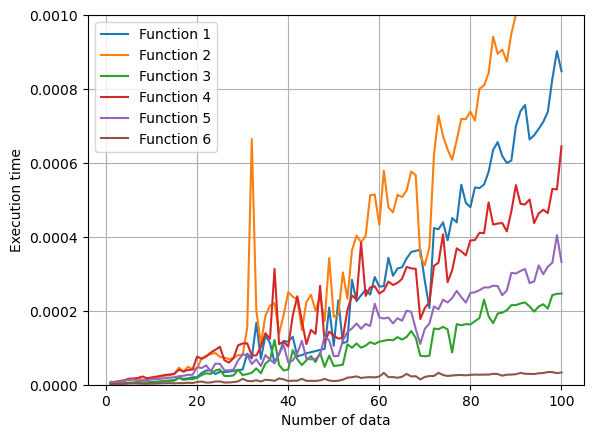

In [26]:
plotGraph(n, times1, 'Function 1')
plotGraph(n, times2, 'Function 2')
plotGraph(n, times3, 'Function 3')
plotGraph(n, times4, 'Function 4',)
plotGraph(n, times5, 'Function 5')
plotGraph(n, times6, 'Function 6')
plt.xlabel('Number of data')
plt.ylabel('Execution time')
plt.legend()
plt.ylim(0,0.001)
plt.grid()

## CURVE FITTING

In [27]:
# Polynomial Fit

def get_poly_fit(x,y,degree):
    z = np.polyfit(x,y,degree)
    f = np.poly1d(z)
    return f

def get_r2(x,y,degree):
    f = get_poly_fit(x,y,degree)
    yhat = f(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y-ybar)**2)
    return ssreg/sstot

def plot_fit(x, y, title, x_label, y_label, degree):
    f = get_poly_fit(x, y, degree)
    plt.plot(x, f(x), 'r--', label='fit: r2=%5.3f' % get_r2(x, y, degree))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

# Logarithmic fit
def get_log_fit(x, y):
    def func(x, a, b):
        return list(map(lambda n: n * a * np.log(n*b), x))
    popt, pcov = curve_fit(func, x, y)
    return func(x, *popt)

def get_r2_log(x, y):
    yhat = get_log_fit(x, y)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg / sstot

def plot_log_fit(x, y, title, x_label, y_label):
    f = get_log_fit(x,y)
    plt.plot(x, f, 'r--', label='fit: r^2=%5.3f' % get_r2_log(x, y))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

# Linear fit
def get_line_fit(x, y):
    def func(x, a, b):
        return list(map(lambda n: n*a+b, x))
    popt, pcov = curve_fit(func, x, y)
    return func(x, *popt)

def get_r2_line(x, y):
    yhat = get_line_fit(x, y)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg / sstot

def plot_line_fit(x, y, title, x_label, y_label):
    f = get_line_fit(x, y)
    plt.plot(x, f, 'r--', label='fit: r^2=%5.3f' % get_r2_line(x, y))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

x = n

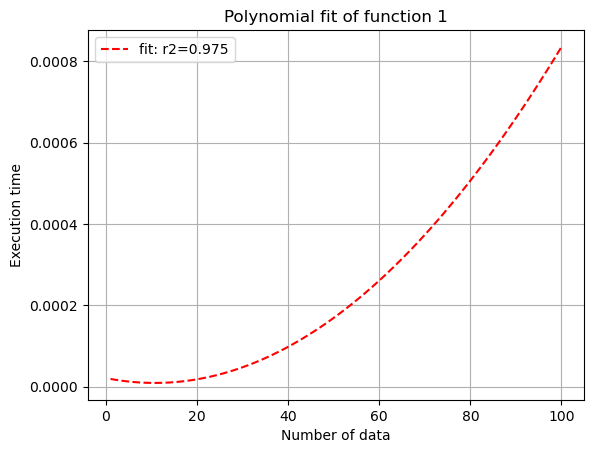

In [28]:
y = times1
plot_fit(x, y, "Polynomial fit of function 1", 'Number of data', 'Execution time', 2)

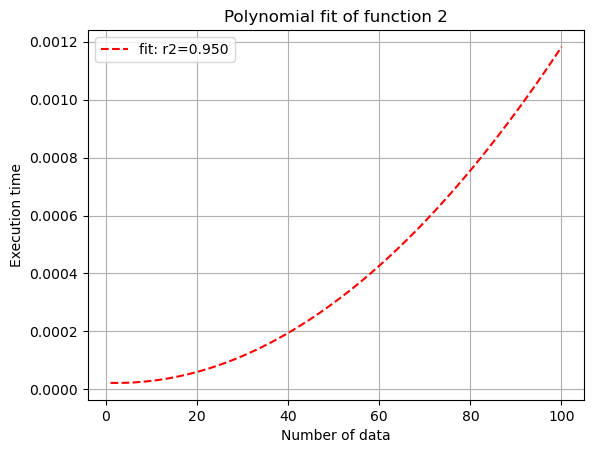

In [29]:
y = times2
plot_fit(x, y, "Polynomial fit of function 2", 'Number of data', 'Execution time', 2)

/tmp/ipykernel_55655/3085527654.py:29: RuntimeWarning: invalid value encountered in log
  return list(map(lambda n: n * a * np.log(n*b), x))


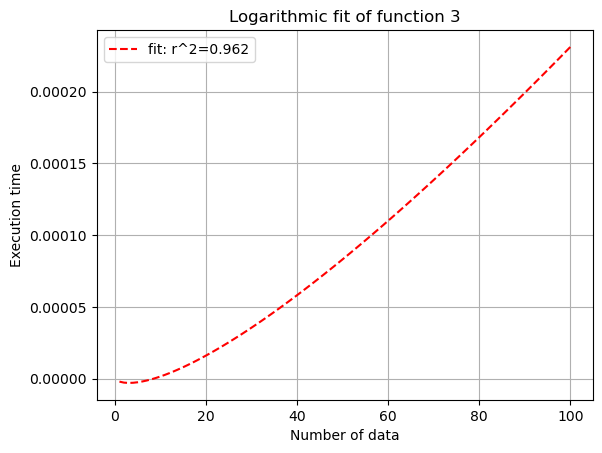

In [30]:
y = times3
plot_log_fit(x,y, "Logarithmic fit of function 3", 'Number of data', 'Execution time')

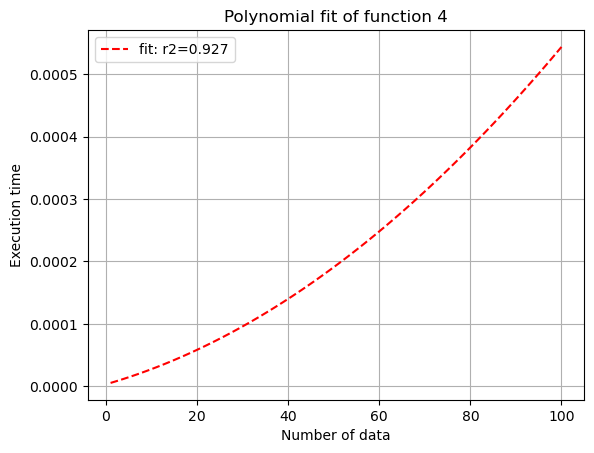

In [31]:
y = times4
plot_fit(x, y, "Polynomial fit of function 4", 'Number of data', 'Execution time', 2)

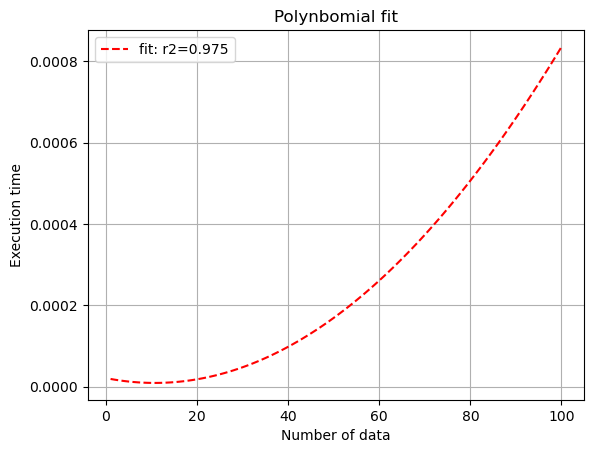

In [32]:
x = n
plot_fit(x,times1, 'Polynbomial fit', 'Number of data', 'Execution time', 2)

/tmp/ipykernel_55655/3085527654.py:29: RuntimeWarning: invalid value encountered in log
  return list(map(lambda n: n * a * np.log(n*b), x))


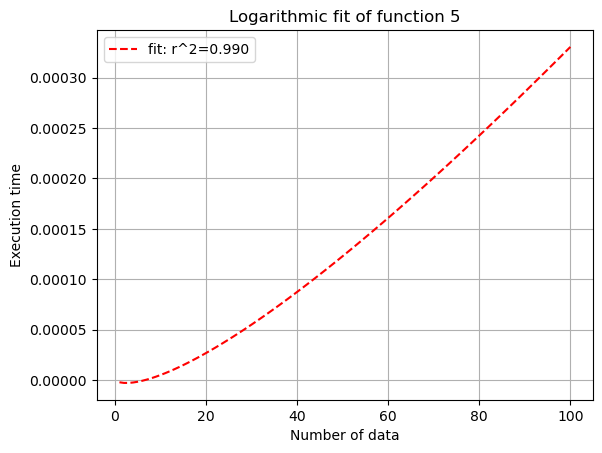

In [33]:
y = times5
plot_log_fit(x,y, "Logarithmic fit of function 5", 'Number of data', 'Execution time')

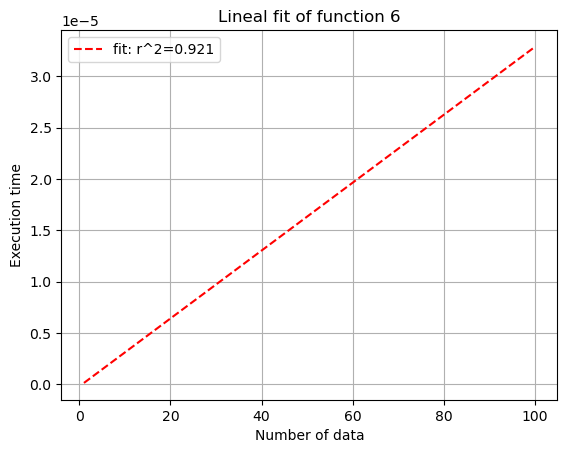

In [34]:
y = times6
plot_line_fit(x,y,"Lineal fit of function 6", 'Number of data', 'Execution time')

## Conclusions

According to the previous analysis, it was decided to choose to work with **function 6** for the development of the ```app``` requested in the test.